# Predicting Heart Disease Using Machine Learning.

We're going to take the folllowing approach:
1. Problem statement 
2. Data Preprocessing
3. Train And Split Data
4. Logestic Regression Model 

## Importing Libraries

In [112]:
import pandas as pd #reading of the data set 
import numpy as np #matrix multiplication and data manipulation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pickle

##iterate dataset into two parts one for training and other for testing 
from sklearn.model_selection import train_test_split,cross_val_score

##standardscaler function to standardize the numerical_cols in unit variance

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Dataset 

In [69]:
df =pd.read_csv(r"C:\Users\pande\OneDrive\Documents\heart-disease.csv.xls")

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Information of dataset 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [73]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## DATA  REPRESENTATION 

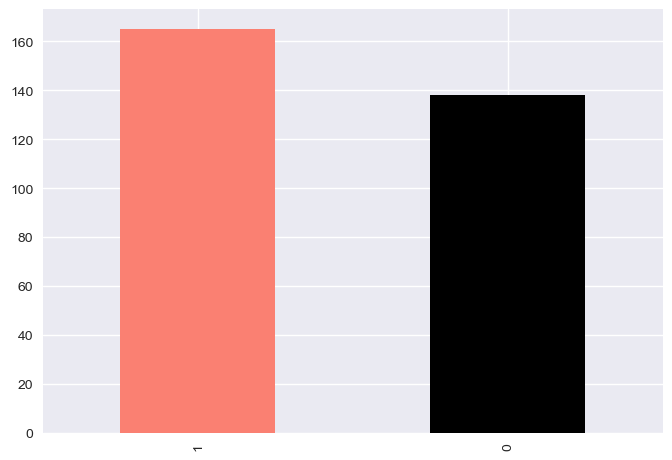

In [79]:
df["HeartDisease"].value_counts().plot(kind="bar", color=["salmon", "black"]);

### Heart disease frequency according to sex 

In [81]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [83]:
# compare target column with sex column 
pd.crosstab(df.HeartDisease, df.sex)

sex,0,1
HeartDisease,,
0,24,114
1,72,93


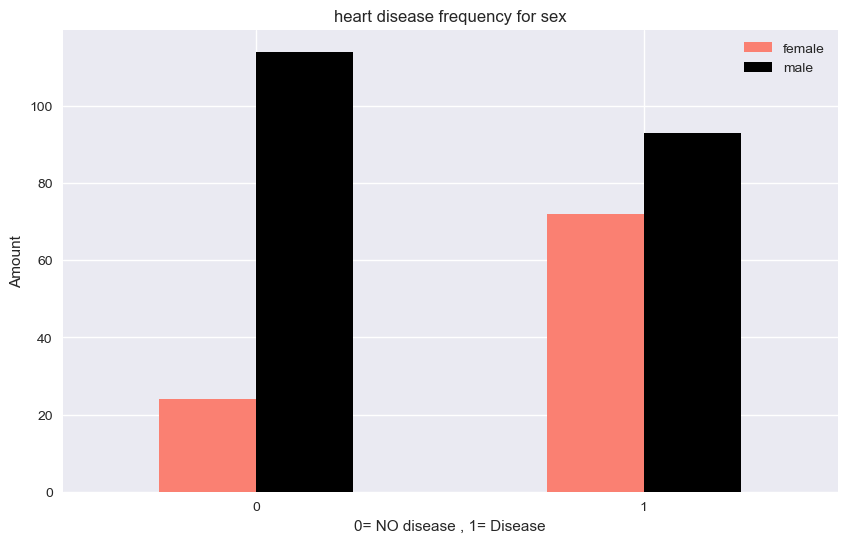

In [85]:
# create a plot for cross tab 
pd.crosstab(df.HeartDisease, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "black"])
plt.title("heart disease frequency for sex")
plt.xlabel("0= NO disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

### Age vs Max Heart rate for heart disease  

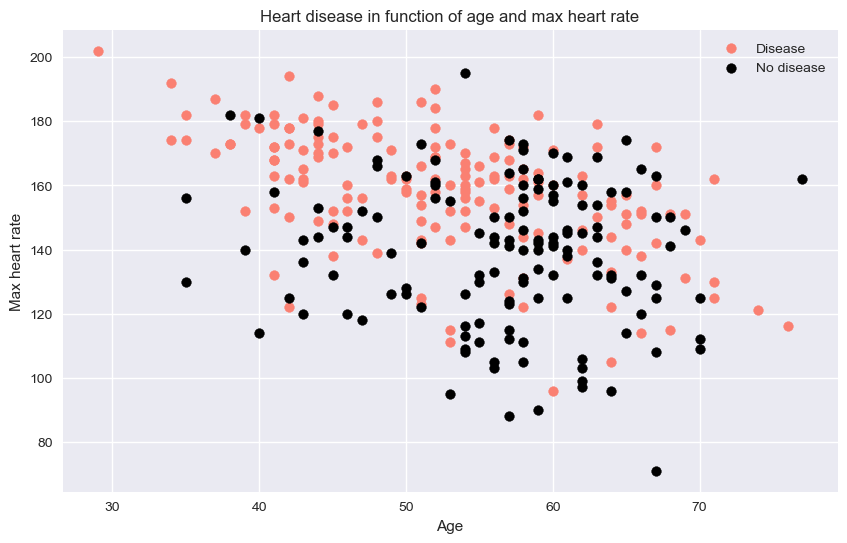

In [88]:
# create another figure 
plt.figure(figsize=(10,6))


plt.scatter(df.age[df.HeartDisease==1],
           df.thalach[df.HeartDisease==1],
           c="salmon")


plt.scatter(df.age[df.HeartDisease==0],
           df.thalach[df.HeartDisease==0],
           c="black");


plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No disease"]);

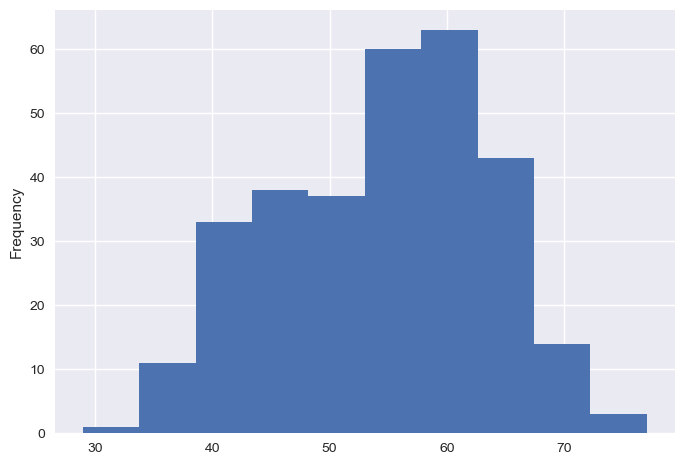

In [89]:
# Distribution of age 
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [92]:
pd.crosstab(df.cp, df.HeartDisease)

HeartDisease,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


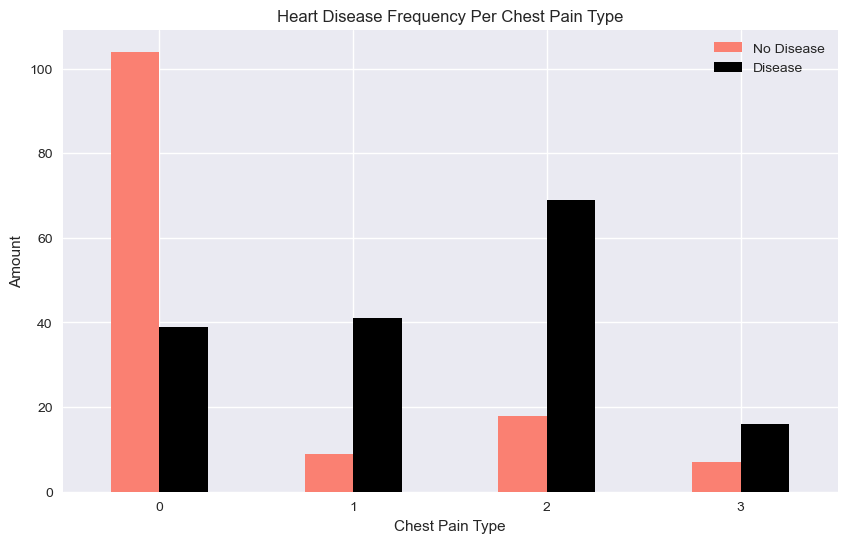

In [94]:
pd.crosstab(df.cp, df.HeartDisease).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "black"])


plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [95]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

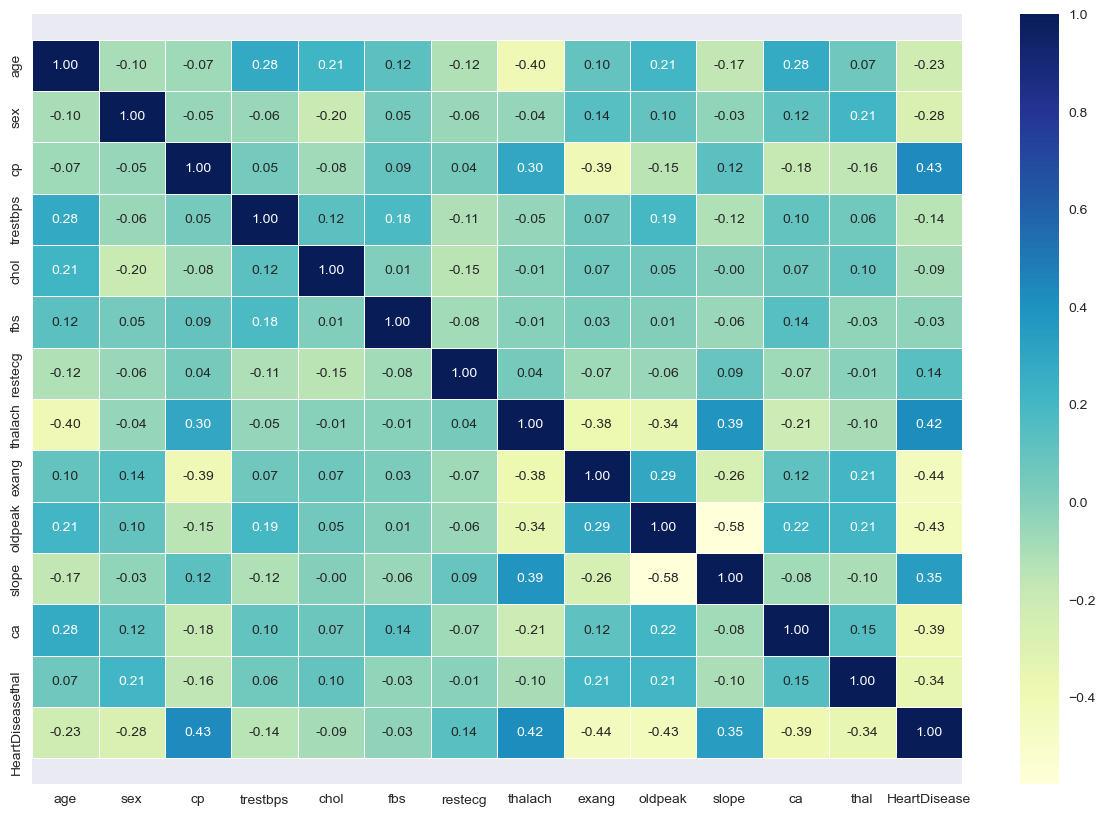

In [96]:
# correlation matrix prettier 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Chance of heartattack.

In [90]:
labels = ["Less chance of heart attack", "More chance of heart attack"]
values = [df[df["HeartDisease"] == 1].count().to_numpy()[0],
         df[df["HeartDisease"] == 0].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values, 
                             marker_colors=['cyan' ,'darkblue'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Chance of heart disease', layout_showlegend=False)
fig.show()

In [74]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Cholesterol 

<AxesSubplot:xlabel='chol'>

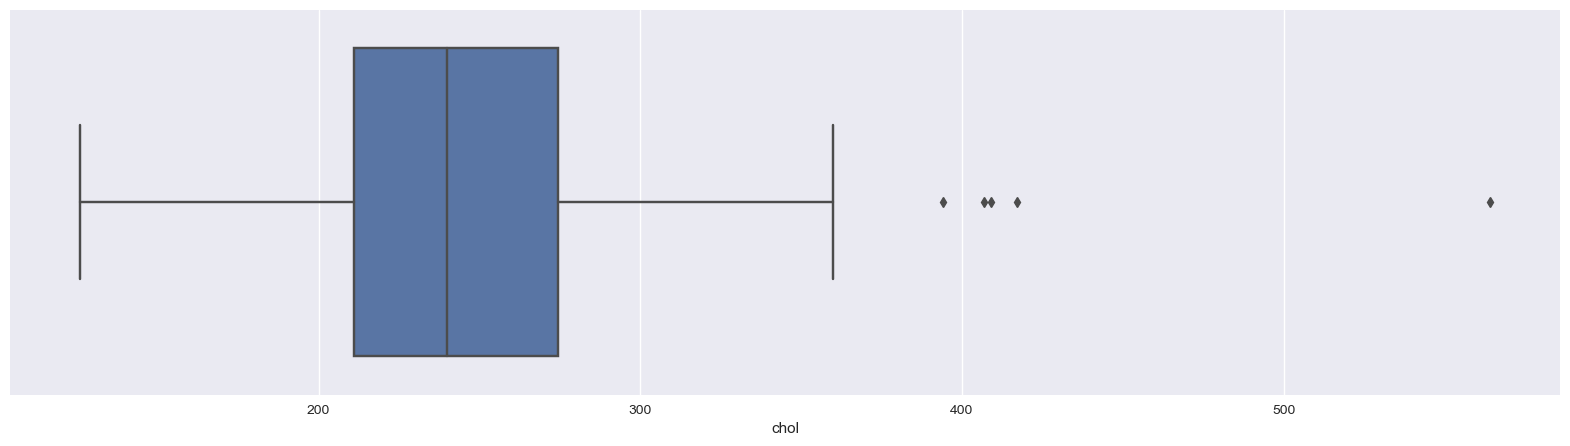

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="chol")

## Dummies using pandas to convert categorical value to one-hot encoding  

In [21]:
df=pd.get_dummies(df,columns=["cp","restecg"])

In [22]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,HeartDisease,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,1,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,1,0,0


In [76]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [77]:
df=df.rename(columns={"target":"HeartDisease"})

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [26]:
numerical_cols=["age","trestbps","chol","thalach","oldpeak"]
cat_cols=list(set(df.columns)-set(numerical_cols)-{"HeartDisease"})

In [27]:
cat_cols

['restecg_2.0',
 'restecg_0.0',
 'sex',
 'restecg_1.0',
 'cp_4',
 'fbs',
 'cp_2',
 'cp_3',
 'exang',
 'cp_1']

In [28]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Splitting Dataset 

In [29]:
df_train , df_test= train_test_split(df,test_size=0.2,random_state=42)

In [30]:
len(df_train),len(df_test)

(208, 53)

In [105]:
##creating object of standard scaler
scaler=StandardScaler()

def get_features_and_target_arrays(df,numericals_cols,cat_cols,scaler):
    x_numeric_scaled=scaler.fit_transform(df[numerical_cols])   ##normalization (0,1) scale
    x_categorical=df[cat_cols].to_numpy()   ## categorical cols
    x=np.hstack((x_categorical,x_numeric_scaled))
    y=df["HeartDisease"]
    
    return x,y
    

In [32]:
x_train, y_train=get_features_and_target_arrays(df_train,cat_cols,numerical_cols,scaler)

In [107]:
X = df.drop("HeartDisease", axis=1)

y = df["HeartDisease"]

In [108]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# Logistic Regression Model

In [36]:
## Training of the model 

clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [41]:
x_test,y_test=get_features_and_target_arrays(df_test,cat_cols,numerical_cols,scaler)

In [47]:
test_pred=clf.predict(x_test)

In [56]:
print("Error:",mean_squared_error(y_test,test_pred))

Error: 0.1320754716981132


In [54]:
print("Accuracy:",accuracy_score(y_test,test_pred))

Accuracy: 0.8679245283018868


In [53]:
confusion_matrix(y_test,test_pred)

array([[30,  3],
       [ 4, 16]], dtype=int64)

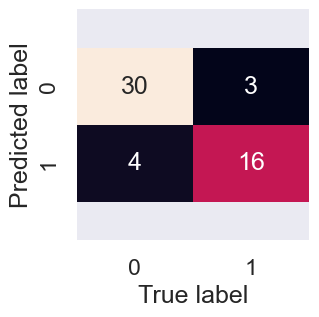

In [100]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, test_pred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, test_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, test_pred)